In [2]:
source('source.r')
source('../../Programs/source.kahru.r')
library(gstat)

Packages Loaded:
ncdf4 R.matlab openxlsx RColorBrewer compiler lattice geosphere readxl data.table rworldmap rworldxtra


# Spatial Analysis Module

This module is designed to analyze the spatial commonent of the O2:Ar based NCP signal. In particular, its goal is to interpret transects and survey grids.

In [3]:
load(file='./RStates/ship.ncp.2min.rdata')

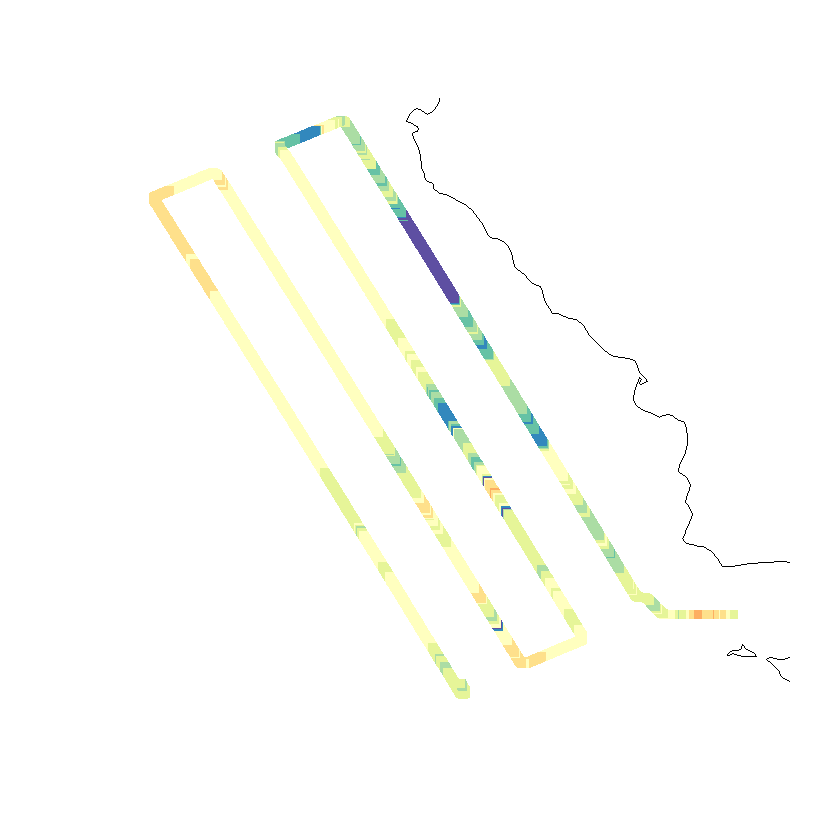

In [4]:
l = which(ship.data$Cycle == 'SeaSoar1')
plot.map(ship.data$LO[l], ship.data$LA[l], col=make.div.pal2(ship.data$NCP.MIMS[l], n = 10, min = -100, max = 100), pch=15)

In [6]:
sst = read.satellite(input.dir = '../../Data/Satellite/Kahru_SST_5day_4k/', file = '20171612017165_SST_comp_mapped.nc',
                     conv = conv.sst)

sst = get.kahru.grid(sst)

## Construct useful objects
sst.grid = data.frame(LA = sst$grid$lat, LO = sst$grid$lon)
sst = data.frame(TT = as.numeric(sst$field), LA = sst$grid$lat, LO = sst$grid$lon)

#coordinates(sst) = ~LA + LO
#coordinates(sst.grid) = ~LA + LO

In [7]:
ss1 = as.data.frame(ship.data[l,])

## Make Spatial Points Data Frame
#coordinates(ss1) = ~LA + LO

---
# Fit a Model

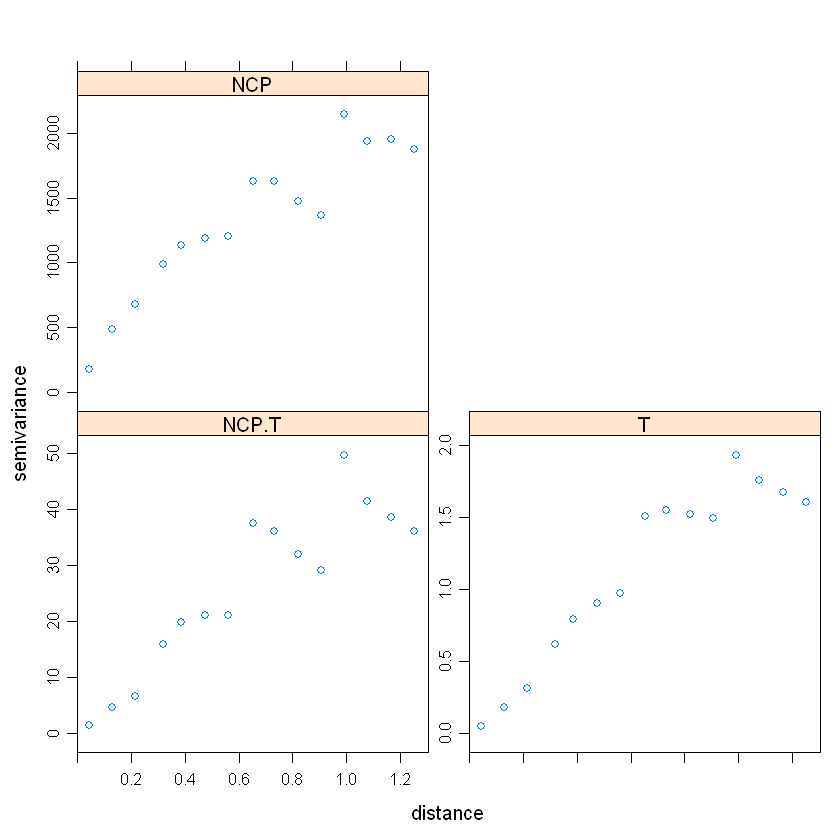

In [16]:
ss1.ok = gstat(id = 'NCP', formula = NCP.MIMS ~ 1, locations = ~LO+LA, data = ss1, set = list(nocheck = 1))
ss1.ck = gstat(ss1.ok, id = 'T', formula = TT ~ 1, locations = ~LO+LA, data = ss1, set = list(nocheck = 1))

plot(variogram(ss1.ck))

In [ ]:
## experimental variogam
#ss1.vario <- variogram(NCP.MIMS ~ TT+1, data = ss1)
#plot(ss1.vario, pl=T)

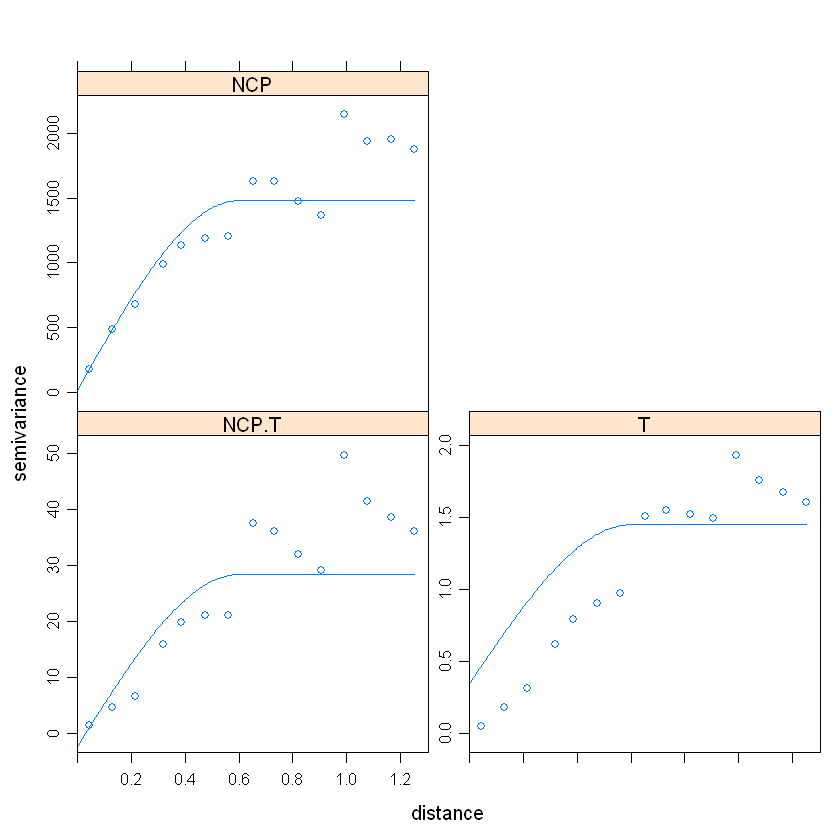

In [17]:
# estimate variogram model form and parameters by eye
ss1.model = vgm(600, "Sph", 0.6, 150)

vario = variogram(ss1.ck)

ss1.model.fit = fit.lmc(vario, ss1.ck, model = ss1.model)

plot(vario, ss1.model.fit)

In [18]:
ss1.res = predict(ss1.model.fit, sst.grid)

non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(ss1.model.fit, sst.grid):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]


In [19]:
ss1.cv = gstat.cv(ss1.model.fit)

non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]
non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(object, newdata = data[sel, ], ...):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"

Now checking for Cauchy-Schwartz inequalities:
variogram(var0,var1) passed Cauchy-Schwartz
[using ordinary cokriging]


# Interpolate

In [ ]:
## Krige
ss1.kriged = krige(id = 'NCP', NCP.MIMS ~ 1, locations = ss1, newdata = sst.grid, model = ss1.model.fit)

summary(ss1.kriged)

In [ ]:
#par(mfrow=c(2,2))

plot.map(ship.data$LO[l], ship.data$LA[l], col='white')

points(ss1.grid$LO, ss1.grid$LA, col=make.div.pal2(ss1.kriged$NCP.pred, n = 100, min = -100, max = 100), pch=15, cex=0.7)

points(ship.data$LO[l], ship.data$LA[l], col='white', pch=15)
points(ship.data$LO[l], ship.data$LA[l], col=make.div.pal2(ship.data$NCP.MIMS[l], n = 100, min = -100, max = 100),
       pch=16, cex=0.6)

plot.map(ss1.grid$LO, ss1.grid$LA, col=make.div.pal(ss1.kriged$NCP.var, n = 10), pch=15, cex=1.4)

points(ship.data$LO[l], ship.data$LA[l], col='white', pch=15, cex=0.4)

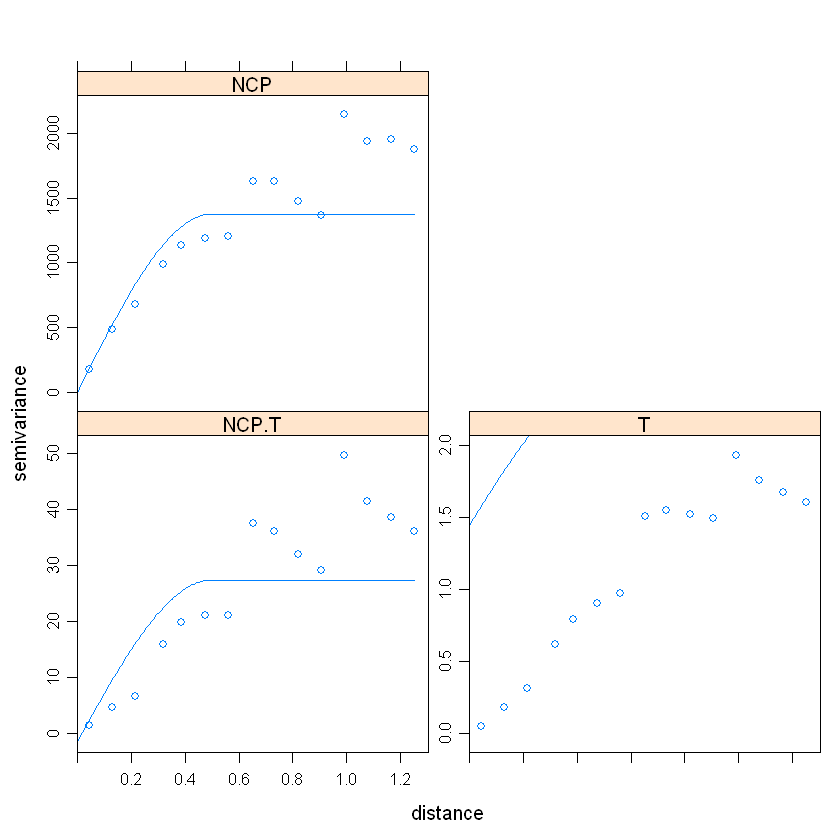

In [56]:
# experimental variogam
g1 = gstat(id="NCP", formula = NCP.MIMS~1, locations = ~LO+LA, data = ss1) 
g1 = gstat(g1, id="T", formula = TT~1, locations = ~LO+LA, data = ss1)

vm = variogram(g1)

v.fit <- vgm(500, "Sph", 0.5, 5)

vm.fit <- fit.lmc(vm, g1, model=v.fit) 

#Plot the fitted variograms to all the sample variograms:
plot(variogram(g1), vm.fit)

In [59]:
ck = predict(vm.fit, data.frame(LA = sst$grid$lat, LO = sst$grid$lon))

non-positive definite coefficient matrix in structure 1

Warning message in predict.gstat(vm.fit, data.frame(LA = sst$grid$lat, LO = sst$grid$lon)):
"No Intrinsic Correlation or Linear Model of Coregionalization found
Reason: coefficient matrix not positive definite"Warning message in predict.gstat(vm.fit, data.frame(LA = sst$grid$lat, LO = sst$grid$lon)):
"[add `set = list(nocheck = 1)' to the gstat() or krige() to ignore the following error]"

ERROR: Error in predict.gstat(vm.fit, data.frame(LA = sst$grid$lat, LO = sst$grid$lon)): value not allowed for: variograms do not satisfy a legal model
